In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_excel("Email Marketing Analysis.xlsx")
df.head()

,Column1,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled on,Living status
0,00005DCC-4E51-41A5-91C5-6635B24C7D17,Business,InActive,NaN,NaN,500024.0,MALE,2018-08-12 17:07:12.430,U,2018-08-12 17:07:12.430,couple with children
1,0001F49E-9FE7-11e8-9E9C-00505682069A,Individual,Active,Valsad,GUJARAT,396001.0,MALE,1992-11-02 00:00:00.000,M,2018-08-14 18:02:46.000,couple with children
2,0001F4A2-9FE7-11e8-9E9C-00505682069A,Individual,Active,Secunderabad,TELANGANA,500011.0,FEMALE,1988-11-25 00:00:00.000,M,2018-08-14 18:05:23.000,couple with children
3,0001F4CD-9FE7-11e8-9E9C-00505682069A,Individual,Active,Nalgonda,TELANGANA,508101.0,MALE,1983-06-13 00:00:00.000,M,2018-08-14 18:37:33.000,couple with children
4,0001F4DE-9FE7-11e8-9E9C-00505682069A,Individual,Active,Hyderabad,TELANGANA,500028.0,MALE,1975-07-13 00:00:00.000,M,2018-08-14 18:47:00.000,couple with children


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Column1        10000 non-null  object        
 1   Type           10000 non-null  object        
 2   Status         10000 non-null  object        
 3   City           9927 non-null   object        
 4   State          9874 non-null   object        
 5   PostalCode     9999 non-null   float64       
 6   GenderCode     10000 non-null  object        
 7   BirthDate      10000 non-null  datetime64[ns]
 8   MaritalStatus  10000 non-null  object        
 9   Enrolled on    10000 non-null  datetime64[ns]
 10  Living status  10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 859.5+ KB


In [112]:
df.isnull().sum()

Column1            0
Type               0
Status             0
City              73
State            126
PostalCode         1
GenderCode         0
BirthDate          0
MaritalStatus      0
Enrolled on        0
Living status      0
dtype: int64

## observation : 
- "Enrolled on" column  is not as per syntax

In [113]:
df.columns

Index(['Column1', 'Type', 'Status', 'City', 'State', 'PostalCode',
       'GenderCode', 'BirthDate', 'MaritalStatus', 'Enrolled on ',
       'Living status'],
      dtype='object')

In [114]:
df['Type'].unique()

array(['Business', 'Individual'], dtype=object)

In [115]:
df['Type'].value_counts()

Type
Individual    9736
Business       264
Name: count, dtype: int64

In [116]:
df['Status'].unique()

array(['InActive', 'Active', 'Inactive'], dtype=object)

# observation 
- status has typo mistakes

In [117]:
df['Status'].value_counts()

Status
Active      9900
InActive      73
Inactive      27
Name: count, dtype: int64

In [118]:
df['City'].unique()

array([nan, 'Valsad', 'Secunderabad', 'Nalgonda', 'Hyderabad',
       'Nizamabad', 'Guntur', 'Barasat', '24 Parganas', 'Bengaluru',
       'New Delhi', 'Karimnagar', 'Kurnool', 'Nashik', 'Mumbai',
       'Nellore', 'Lucknow', 'Jaipur City', 'Delhi', 'Chinsurah',
       'Guwahati', 'Hyderabad City', 'Goa', 'Gurgaon', 'Thane',
       'Vijayawada', 'Ahmedabad', 'Bangalore', 'Sangareddy', 'Ambala',
       'Tirupati', 'Peddapalli', 'Kakinada', 'Haveli', 'Chennai',
       'Ahmedabad City', 'New Mumbai', 'Pune City', 'West Godavari',
       'Jaipur', 'Pune', 'Bhopal', 'Madurai', 'Kengeri', 'Sangli',
       'Cachar', 'HYDERABAD', 'Mumbai  East', 'Beed', 'Medak', 'Prakasam',
       'Chittoor', 'Adilabad', 'Mumbai  West', 'Wanaparthy',
       'Hyderabad South East', 'Thane Central', 'Kolkata', 'Ernakulam',
       'Bhubaneswar', 'Warangal', 'Nandyal', 'Mukhed', 'Idukki',
       'Krishna', 'Alibag', 'Tambaram', 'Hanamkonda', 'Visakhapatnam',
       'Navi Mumbai', 'Hardoi', 'Yerraguntla', 'Bardhama

In [119]:
df['City'].value_counts()

City
Hyderabad         2639
Secunderabad      2093
Mumbai            1498
Hyderabad City     976
Thane              227
                  ... 
Baramati             1
Dimapur              1
Ajmer                1
Faridkot             1
Hindupur             1
Name: count, Length: 388, dtype: int64

# observation
- city names have "typo" mistakes

In [120]:
df['State'].unique()

array([nan, 'GUJARAT', 'TELANGANA', 'ANDHRA PRADESH', 'WEST BENGAL',
       'KARNATAKA', 'DELHI', 'MAHARASHTRA', 'UTTAR PRADESH', 'RAJASTHAN',
       'ASSAM', 'HARYANA', 'TAMIL NADU', 'MADHYA PRADESH', 'KERALA',
       'ODISHA', 'CHANDIGARH', 'PONDICHERRY', 'PUNJAB', 'GOA',
       'Telangana', 'JHARKHAND', 'Andhra Pradesh', 'MEGHALAYA', 'BIHAR',
       'HIMACHAL PRADESH', 'CHATTISGARH', 'TAMILNADU', 'NAGALAND',
       'UTTARAKHAND', 'SIKKIM', 'TRIPURA', 'CHHATTISGARH',
       'DAMAN and DIU', 'PUDUCHERRY', 'ARUNACHAL PRADESH'], dtype=object)

# observation 
- state have upper and lower case names are repeated

In [121]:
df['State'].value_counts()

State
TELANGANA            4304
MAHARASHTRA          2236
ANDHRA PRADESH       2123
KARNATAKA             391
DELHI                 150
TAMIL NADU            124
UTTAR PRADESH          75
KERALA                 74
HARYANA                70
GUJARAT                69
WEST BENGAL            54
RAJASTHAN              35
MADHYA PRADESH         32
Telangana              27
PUNJAB                 22
Andhra Pradesh         12
GOA                    11
BIHAR                  10
JHARKHAND              10
ODISHA                  7
CHATTISGARH             5
ASSAM                   5
HIMACHAL PRADESH        4
CHANDIGARH              4
MEGHALAYA               3
PONDICHERRY             3
NAGALAND                3
UTTARAKHAND             3
TRIPURA                 2
TAMILNADU               1
SIKKIM                  1
CHHATTISGARH            1
DAMAN and DIU           1
PUDUCHERRY              1
ARUNACHAL PRADESH       1
Name: count, dtype: int64

In [122]:
df['PostalCode'].unique()

array([500024., 396001., 500011., ..., 560073., 560009., 515331.])

# observation
- nan values

In [123]:
df['GenderCode'].unique()

array(['MALE', 'FEMALE', 'OTHER', 'Not Mention'], dtype=object)

In [124]:
df['GenderCode'].value_counts()

GenderCode
MALE           6887
FEMALE         2907
Not Mention     189
OTHER            17
Name: count, dtype: int64

# osbervation:
- some values are in not mentioned,which gender is

In [125]:
df['BirthDate'].unique()

<DatetimeArray>
['2018-08-12 17:07:12.430000',        '1992-11-02 00:00:00',
        '1988-11-25 00:00:00',        '1983-06-13 00:00:00',
        '1975-07-13 00:00:00',        '1986-08-07 00:00:00',
        '1997-05-20 00:00:00',        '1982-06-26 00:00:00',
        '1977-06-20 00:00:00',        '1975-07-23 00:00:00',
 ...
        '1992-10-30 00:00:00',        '1992-09-04 00:00:00',
        '1975-06-04 00:00:00',        '1961-08-06 00:00:00',
        '1986-04-09 00:00:00',        '1989-09-04 00:00:00',
        '1987-01-02 00:00:00',        '1987-03-15 00:00:00',
        '1978-02-10 00:00:00',        '1984-11-22 00:00:00']
Length: 6756, dtype: datetime64[ns]

In [126]:
df['MaritalStatus'].unique()

array(['U', 'M'], dtype=object)

In [127]:
df['MaritalStatus'].value_counts()

MaritalStatus
M    9676
U     324
Name: count, dtype: int64

# observation:
- married are 9676 and unmarried are  324

In [128]:
df['Enrolled on '].unique()

<DatetimeArray>
['2018-08-12 17:07:12.430000',        '2018-08-14 18:02:46',
        '2018-08-14 18:05:23',        '2018-08-14 18:37:33',
        '2018-08-14 18:47:00',        '2018-08-14 19:33:29',
        '2018-08-14 19:59:03',        '2018-08-14 20:05:17',
        '2018-08-14 20:15:06',        '2018-08-14 20:19:48',
 ...
        '2018-06-09 02:59:00',        '2018-06-09 02:59:16',
        '2018-06-09 03:06:13',        '2018-06-09 03:10:40',
        '2018-06-09 03:34:58',        '2018-06-09 03:36:15',
        '2018-06-09 03:38:05',        '2018-06-09 03:55:25',
        '2018-06-09 04:00:01',        '2018-06-09 04:05:30']
Length: 9994, dtype: datetime64[ns]

In [129]:
df['Enrolled on '].nunique()

9994

### cleaning
 - replacing &
 - removing nulls
 

In [130]:
df.rename(columns={"Enrolled on ": "Enrolled_on"}, inplace=True)

In [131]:
df.loc[df['City'] == 'Hyderabad City', ['City', 'State']] = ['Hyderabad', 'Telengana']
df.loc[df['City'] == 'Hyderabad',['City','State']] = ['Hyderabad', 'Telengana']
df.loc[df['City'] == 'Secunderabad',['City','State']] = ['Secunderabad','Telengana']
df.replace({'BENGALURU':'BANGALORE'},inplace = True)
df.replace({'bangalore':'BANGALORE'},inplace = True)
df.replace({'CHHATTISGARH':'CHATTISGARH'},inplace = True)
df["City"] = df["City"].replace({
    "BANGLORE": "BANGALORE",
    "Bangalore": "BANGALORE",
    "Bengaluru": "BANGALORE",
    "Bhubaneshwar": "Bhubaneswar",
    "Delhi": "DELHI",
    "Dharwar": "Dharwad",
    "HYD": "Hyderabad",
    "HYDERABAD": "Hyderabad",
    "HYDrabad": "Hyderabad",
    "SECUNDERABAD": "Secunderabad",
    "hyderabad": "Hyderabad"})
df["Status"] = df["Status"].replace({'InActive':'Inactive'})
df['State'] = df['State'].replace({"Telengana":"TELANGANA"})
df.replace({"TAMILNADU":"TAMIL NADU"},inplace=True)
df.replace({"Not Mention":"NA"},inplace=True)

In [132]:
df.drop('Column1', axis=1, inplace=True, errors='ignore')

## WHY:
- "CITY" columns has "wrong/small/upper" cases are there,so i replaced with one (upeer/lower ) case.
- "STATE" columns has wrong/small/upper cases are there,so i replaced with one (upeer/lower ) case.
- "STATUS" columns has repetaed one "word with mix letters",so i "replaced" both in one format.
- In "GENDER" column some are "not mentioned",so i replaced with "NA" and then i filled with "mode". 

In [133]:
df.isnull().sum()

Type               0
Status             0
City              73
State            109
PostalCode         1
GenderCode         0
BirthDate          0
MaritalStatus      0
Enrolled_on        0
Living status      0
dtype: int64

In [134]:
# Convert "NA" to actual NaN
df["GenderCode"] = df["GenderCode"].replace("NA", np.nan)
df["GenderCode"] = df["GenderCode"].fillna(df["GenderCode"].mode()[0])

## WHY:
- In "GENDER" column some are "not mentioned",so i replaced with "NA" and then i filled with "mode". 

In [135]:
df["GenderCode"].value_counts()

GenderCode
MALE      7076
FEMALE    2907
OTHER       17
Name: count, dtype: int64

In [136]:
df['Status'].value_counts()

Status
Active      9900
Inactive     100
Name: count, dtype: int64

In [137]:
df.isnull().sum()

Type               0
Status             0
City              73
State            109
PostalCode         1
GenderCode         0
BirthDate          0
MaritalStatus      0
Enrolled_on        0
Living status      0
dtype: int64

In [138]:
df[df["City"].isnull()]

,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status
0,Business,Inactive,NaN,NaN,500024.0,MALE,2018-08-12 17:07:12.430,U,2018-08-12 17:07:12.430,couple with children
451,Business,Inactive,NaN,NaN,248001.0,MALE,2018-09-02 23:07:39.447,U,2018-09-02 23:07:39.430,couple with children
452,Business,Inactive,NaN,NaN,829121.0,MALE,2018-08-08 21:10:00.513,U,2018-08-08 21:10:00.510,couple with children
546,Business,Inactive,NaN,NaN,272182.0,MALE,2018-08-21 09:43:50.780,U,2018-08-21 09:43:50.767,couple with children
547,Business,Inactive,NaN,NaN,396001.0,MALE,2018-09-01 00:25:41.370,U,2018-09-01 00:25:41.363,couple with children
...,...,...,...,...,...,...,...,...,...,...
9612,Business,Inactive,NaN,NaN,400064.0,MALE,2018-08-10 12:57:40.290,U,2018-08-10 12:57:40.287,Single/living alone
9763,Business,Inactive,NaN,NaN,500089.0,MALE,2018-08-03 03:57:57.723,U,2018-08-03 03:57:57.723,couple with children
9764,Business,Inactive,NaN,NaN,502032.0,MALE,2018-08-10 21:15:59.020,U,2018-08-10 21:15:59.017,couple with children
9814,Business,Inactive,NaN,NaN,500062.0,MALE,2018-08-10 21:31:41.667,U,2018-08-10 21:31:41.667,couple with children


In [139]:
df[df["State"].isnull()]

,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status
0,Business,Inactive,NaN,NaN,500024.0,MALE,2018-08-12 17:07:12.430,U,2018-08-12 17:07:12.430,couple with children
208,Individual,Active,BANGALORE,NaN,NaN,MALE,1984-03-03 00:00:00.000,M,2019-02-08 13:50:58.000,Couple without children
451,Business,Inactive,NaN,NaN,248001.0,MALE,2018-09-02 23:07:39.447,U,2018-09-02 23:07:39.430,couple with children
452,Business,Inactive,NaN,NaN,829121.0,MALE,2018-08-08 21:10:00.513,U,2018-08-08 21:10:00.510,couple with children
546,Business,Inactive,NaN,NaN,272182.0,MALE,2018-08-21 09:43:50.780,U,2018-08-21 09:43:50.767,couple with children
...,...,...,...,...,...,...,...,...,...,...
9612,Business,Inactive,NaN,NaN,400064.0,MALE,2018-08-10 12:57:40.290,U,2018-08-10 12:57:40.287,Single/living alone
9763,Business,Inactive,NaN,NaN,500089.0,MALE,2018-08-03 03:57:57.723,U,2018-08-03 03:57:57.723,couple with children
9764,Business,Inactive,NaN,NaN,502032.0,MALE,2018-08-10 21:15:59.020,U,2018-08-10 21:15:59.017,couple with children
9814,Business,Inactive,NaN,NaN,500062.0,MALE,2018-08-10 21:31:41.667,U,2018-08-10 21:31:41.667,couple with children


In [140]:
df[df["City"].isnull() & df["State"].notnull()]

,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status


In [141]:
df[df["City"].notnull() & df["State"].isnull()]


,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status
208,Individual,Active,BANGALORE,NaN,NaN,MALE,1984-03-03,M,2019-02-08 13:50:58,Couple without children
972,Individual,Active,Pune City,NaN,411032.0,MALE,1994-07-05,M,2020-03-01 17:49:14,couple with children
973,Individual,Active,Mumbai,NaN,400064.0,MALE,1995-06-24,M,2020-03-01 17:59:22,couple with children
974,Individual,Active,New Mumbai,NaN,410210.0,MALE,1992-09-06,M,2020-03-01 21:10:06,couple with children
1074,Individual,Active,Share Later,NaN,500001.0,MALE,1985-10-18,M,2018-11-11 13:36:14,Couple without children
1076,Individual,Active,Share Later,NaN,500001.0,MALE,1982-10-18,M,2018-11-11 13:47:19,Couple without children
1970,Individual,Active,-1,NaN,110096.0,MALE,1989-10-12,M,2018-07-04 10:23:24,Single/living alone
1985,Individual,Active,Pune City,NaN,411057.0,MALE,1988-05-08,M,2020-03-01 16:26:37,Single/living alone
4858,Individual,Active,Thane,NaN,401107.0,MALE,1984-06-07,M,2020-03-03 18:16:41,couple with children
4859,Individual,Active,Hyderabad South East,NaN,500013.0,MALE,1971-10-14,M,2020-03-04 04:41:56,couple with children


In [142]:
df[df["PostalCode"].isnull()]

,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status
208,Individual,Active,BANGALORE,NaN,NaN,MALE,1984-03-03,M,2019-02-08 13:50:58,Couple without children


In [143]:
df["State"].unique()

array([nan, 'GUJARAT', 'TELANGANA', 'ANDHRA PRADESH', 'WEST BENGAL',
       'KARNATAKA', 'DELHI', 'MAHARASHTRA', 'UTTAR PRADESH', 'RAJASTHAN',
       'ASSAM', 'HARYANA', 'TAMIL NADU', 'MADHYA PRADESH', 'KERALA',
       'ODISHA', 'CHANDIGARH', 'PONDICHERRY', 'PUNJAB', 'GOA',
       'JHARKHAND', 'MEGHALAYA', 'BIHAR', 'HIMACHAL PRADESH',
       'CHATTISGARH', 'NAGALAND', 'UTTARAKHAND', 'SIKKIM', 'TRIPURA',
       'DAMAN and DIU', 'PUDUCHERRY', 'ARUNACHAL PRADESH'], dtype=object)

In [144]:
# filling with empty state nan values
df["City"] = df["City"].replace(-1, np.nan)
city_to_state = { "Hyderabad South East": "TELANGANA","Tirupati":"ANDHRA PRADESH","BANGALORE": "KARNATAKA","Chennai": "Tamil Nadu",
                 "Pune City": "MAHARASHTRA","Mumbai": "MAHARASHTRA","New Mumbai":"MAHARASHTRA","Thane":"MAHARASHTRA","Bhopal":"MADHYA PRADESH",
                 "Changanach":"KERALA","Kovilpatt":"TAMIL NADU","24 Parganas":"WEST BENGAL","Thrissur":"KERALA","Singhbhum":"JHARKHAND","Ahmednagar":"MAHARASHTRA",
               "Kovilpatti":"TAMIL NADU" }
df["City"] = df["City"].replace(["share later"], np.nan)
df["State"] = df["State"].replace(["NA", "Not Mentioned"], np.nan)
df["State"] = df["State"].fillna(df["City"].map(city_to_state))

## WHY"
- there is a null values in state and city,in this city has names but state has empty values.
- so,i replaced based on city with state by reseach.
- similarly i fill "NA" values with "SHARE LATER" in city column and "NAN" in state 

In [145]:
# Clean State names
df["State"] = df["State"].str.strip().str.title()
# State → Postal Code mapping (example)
state_to_postal = {"Karnataka": 560001}
# Fill PostalCode from State
df["PostalCode"] = df["PostalCode"].fillna(df["State"].map(state_to_postal))

## WHY:
- IN POSTAL code one missing pincode for state is there i  filled with exact value with research.
- in STATE i reomved extra spaces and converts to title case.

In [146]:
df[df["City"].notnull() & df["State"].isnull()]


,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status
1074,Individual,Active,Share Later,NaN,500001.0,MALE,1985-10-18,M,2018-11-11 13:36:14,Couple without children
1076,Individual,Active,Share Later,NaN,500001.0,MALE,1982-10-18,M,2018-11-11 13:47:19,Couple without children


In [147]:
df = df.dropna(subset=["City", "State"])

## WHY:
- in CITY & STATE both have "share later","NaN" values so, i dropped both of them,because data has huge,so it should < 5% by droping 
  this 2 rows,it wont have much effect on data.

In [148]:
df.isnull().sum()

Type             0
Status           0
City             0
State            0
PostalCode       0
GenderCode       0
BirthDate        0
MaritalStatus    0
Enrolled_on      0
Living status    0
dtype: int64

In [149]:
df.duplicated().sum()

0

## now the data is cleaned

In [150]:
df.to_csv("cleaned_data.csv", index=False)


In [151]:
df1 = pd.read_csv("cleaned_data.csv")
df1

,Type,Status,City,State,PostalCode,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status
0,Individual,Active,Valsad,Gujarat,396001.0,MALE,1992-11-02,M,2018-08-14 18:02:46,couple with children
1,Individual,Active,Secunderabad,Telangana,500011.0,FEMALE,1988-11-25,M,2018-08-14 18:05:23,couple with children
2,Individual,Active,Nalgonda,Telangana,508101.0,MALE,1983-06-13,M,2018-08-14 18:37:33,couple with children
3,Individual,Active,Hyderabad,Telangana,500028.0,MALE,1975-07-13,M,2018-08-14 18:47:00,couple with children
4,Individual,Active,Hyderabad,Telangana,500018.0,FEMALE,1986-08-07,M,2018-08-14 19:33:29,couple with children
...,...,...,...,...,...,...,...,...,...,...
9919,Individual,Active,Hyderabad,Telangana,500032.0,MALE,1997-07-03,M,2018-06-09 03:36:15,Couple without children
9920,Individual,Active,Hyderabad,Telangana,500002.0,MALE,1980-05-24,M,2018-06-09 03:38:05,Couple without children
9921,Individual,Active,Secunderabad,Telangana,500080.0,FEMALE,1984-11-22,M,2018-06-09 03:55:25,Couple without children
9922,Individual,Active,Hyderabad,Telangana,500081.0,FEMALE,1994-07-14,M,2018-06-09 04:00:01,Couple without children


In [152]:
df.shape

(9924, 10)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9924 entries, 1 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Type           9924 non-null   object        
 1   Status         9924 non-null   object        
 2   City           9924 non-null   object        
 3   State          9924 non-null   object        
 4   PostalCode     9924 non-null   float64       
 5   GenderCode     9924 non-null   object        
 6   BirthDate      9924 non-null   datetime64[ns]
 7   MaritalStatus  9924 non-null   object        
 8   Enrolled_on    9924 non-null   datetime64[ns]
 9   Living status  9924 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 852.8+ KB


In [154]:
df1["Type"].unique()

array(['Individual', 'Business'], dtype=object)

In [155]:
df1["Status"].unique()

array(['Active', 'Inactive'], dtype=object)

In [156]:
df1["City"].unique()

array(['Valsad', 'Secunderabad', 'Nalgonda', 'Hyderabad', 'Nizamabad',
       'Guntur', 'Barasat', '24 Parganas', 'BANGALORE', 'New Delhi',
       'Karimnagar', 'Kurnool', 'Nashik', 'Mumbai', 'Nellore', 'Lucknow',
       'Jaipur City', 'DELHI', 'Chinsurah', 'Guwahati', 'Goa', 'Gurgaon',
       'Thane', 'Vijayawada', 'Ahmedabad', 'Sangareddy', 'Ambala',
       'Tirupati', 'Peddapalli', 'Kakinada', 'Haveli', 'Chennai',
       'Ahmedabad City', 'New Mumbai', 'Pune City', 'West Godavari',
       'Jaipur', 'Pune', 'Bhopal', 'Madurai', 'Kengeri', 'Sangli',
       'Cachar', 'Mumbai  East', 'Beed', 'Medak', 'Prakasam', 'Chittoor',
       'Adilabad', 'Mumbai  West', 'Wanaparthy', 'Hyderabad South East',
       'Thane Central', 'Kolkata', 'Ernakulam', 'Bhubaneswar', 'Warangal',
       'Nandyal', 'Mukhed', 'Idukki', 'Krishna', 'Alibag', 'Tambaram',
       'Hanamkonda', 'Visakhapatnam', 'Navi Mumbai', 'Hardoi',
       'Yerraguntla', 'Bardhaman', 'Mumbai  North', 'Mumbai  North West',
       'Pedda

In [157]:
df1["PostalCode"].unique()

array([396001., 500011., 508101., ..., 560073., 560009., 515331.])

In [158]:
df1["GenderCode"].unique()

array(['MALE', 'FEMALE', 'OTHER'], dtype=object)

In [159]:
df1["BirthDate"].unique()

array(['1992-11-02', '1988-11-25', '1983-06-13', ..., '1987-03-15',
       '1978-02-10', '1984-11-22'], dtype=object)

In [160]:
df1["MaritalStatus"].unique()

array(['M', 'U'], dtype=object)

In [161]:
df1["Enrolled_on"].unique()

array(['2018-08-14 18:02:46', '2018-08-14 18:05:23',
       '2018-08-14 18:37:33', ..., '2018-06-09 03:55:25',
       '2018-06-09 04:00:01', '2018-06-09 04:05:30'], dtype=object)

In [162]:
df["Living status"].unique()

array(['couple with children', 'Couple without children',
       'Single/living alone'], dtype=object)

In [163]:
df1.describe()

,PostalCode
count,9924.000000
mean,473374.003930
std,84155.006859
min,8905.000000
25%,411036.750000
50%,500034.000000
75%,500082.000000
max,854337.000000


In [164]:
df1.describe(include="object")

,Type,Status,City,State,GenderCode,BirthDate,MaritalStatus,Enrolled_on,Living status
count,9924,9924,9924,9924,9924,9924,9924,9924,9924
unique,2,2,372,31,3,6682,2,9918,3
top,Individual,Active,Hyderabad,Telangana,MALE,1900-01-01,M,2018-08-08 16:38:00,couple with children
freq,9733,9897,3663,6070,7000,242,9673,2,4785


In [165]:
category = ["Type","Status","City","State","GenderCode","BirthDate","MaritalStatus","Enrolled_on","Living status"]

In [166]:
df[category].value_counts()

Type        Status    City       State           GenderCode  BirthDate   MaritalStatus  Enrolled_on          Living status          
Business    Active    AHMEDABAD  Gujarat         MALE        1900-01-01  M              2019-10-23 20:01:57  couple with children       1
Individual  Active    Nandyal    Andhra Pradesh  MALE        1988-06-12  M              2018-08-27 15:45:05  Couple without children    1
                      Nanded     Maharashtra     MALE        1979-05-17  M              2019-08-14 20:59:24  Couple without children    1
                                                             1984-05-07  M              2018-10-11 11:24:01  couple with children       1
                      Nandyal    Andhra Pradesh  FEMALE      1970-08-16  M              2018-11-11 11:25:02  Couple without children    1
                                                                                                                                       ..
                      Hyderabad  Telang

In [167]:
for i in category:
    print(df1[i].value_counts(),"\n")

Type
Individual    9733
Business       191
Name: count, dtype: int64 

Status
Active      9897
Inactive      27
Name: count, dtype: int64 

City
Hyderabad       3663
Secunderabad    2094
Mumbai          1498
BANGALORE        313
Thane            227
                ... 
Presidency         1
Baramati           1
Dimapur            1
Ajmer              1
Hindupur           1
Name: count, Length: 372, dtype: int64 

State
Telangana            6070
Maharashtra          2258
Andhra Pradesh        417
Karnataka             392
Delhi                 150
Tamil Nadu            126
Kerala                 76
Uttar Pradesh          75
Haryana                70
Gujarat                69
West Bengal            55
Rajasthan              35
Madhya Pradesh         33
Punjab                 22
Goa                    11
Jharkhand              11
Bihar                  10
Odisha                  7
Chattisgarh             6
Assam                   5
Himachal Pradesh        4
Chandigarh              4
Megha

## plots 
- status: Active in individual & business.
- status:Active & in city top 10,state top 10.
- gender code:male & female in active.
- marital:m in active & u in active.
- Living status:couple with actvive & w/o active & Single/living alone active.
- 

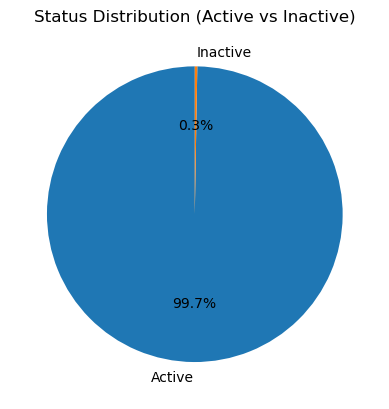

In [191]:
# OVERALL ACTIVE & INACTIVE STATUS
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Status Distribution (Active vs Inactive)")
plt.show()

In [168]:
#q.no1
pd.crosstab(df["Status"],df["Type"],margins=True,normalize=True)

Type,Business,Individual,All
Status,,,
Active,0.018037,0.979242,0.997279
Inactive,0.001209,0.001511,0.002721
All,0.019246,0.980754,1.000000


In [169]:
pd.crosstab(df["Status"],df["Type"])

Type,Business,Individual
Status,,
Active,179,9718
Inactive,12,15


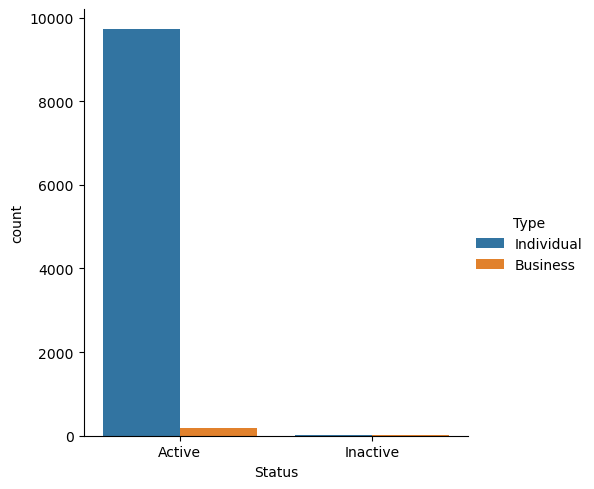

In [170]:
sns.catplot(x='Status',hue= 'Type', data=df,kind='count')
plt.show()

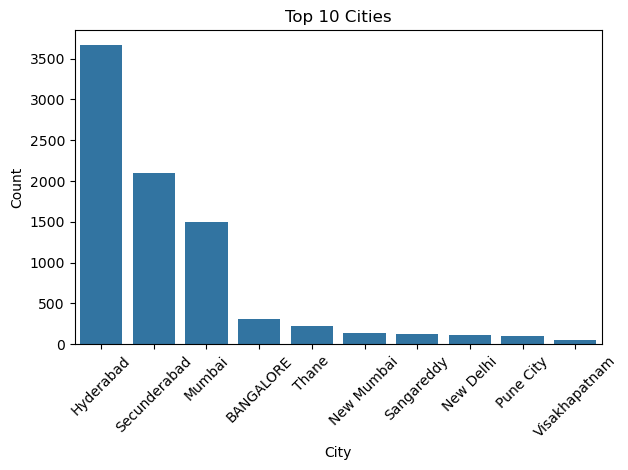

In [171]:
# Top 10 Cities
top_10_cities = df["City"].value_counts().head(10)
sns.barplot( x=top_10_cities.index,y=top_10_cities.values)
plt.title("Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

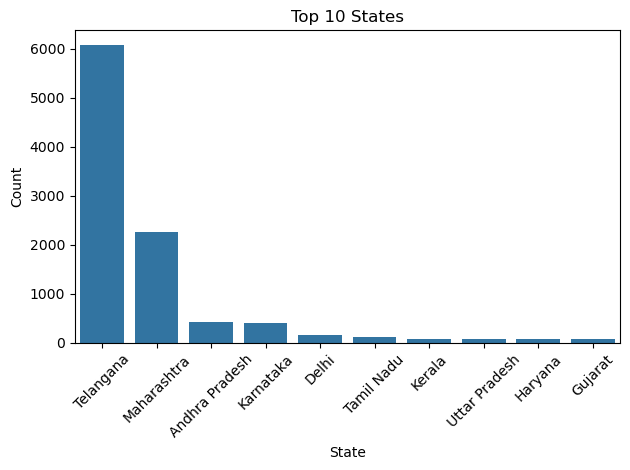

In [172]:
# Top 10 States
top_10_states = df["State"].value_counts().head(10)
sns.barplot(x=top_10_states.index,y=top_10_states.values)
plt.title("Top 10 States")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

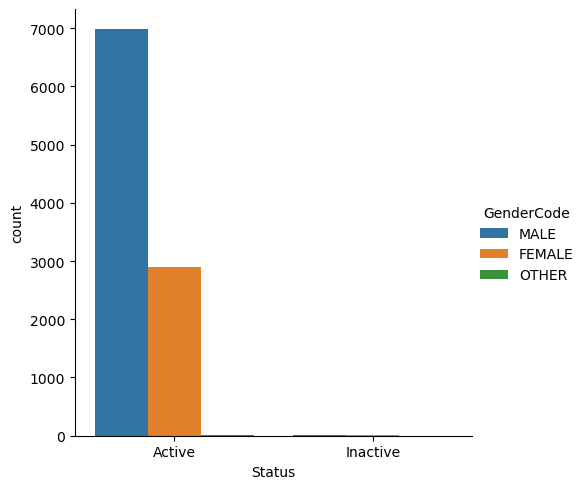

In [173]:
#Q.no3: male & female status
sns.catplot(x='Status',hue='GenderCode',data=df1,kind='count')
plt.show()

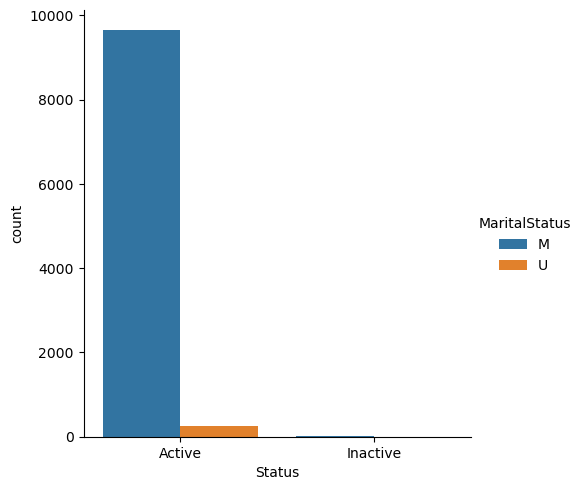

In [174]:
#Q.no4: Marital status 
sns.catplot(x='Status',hue='MaritalStatus',data=df1,kind='count')
plt.show()

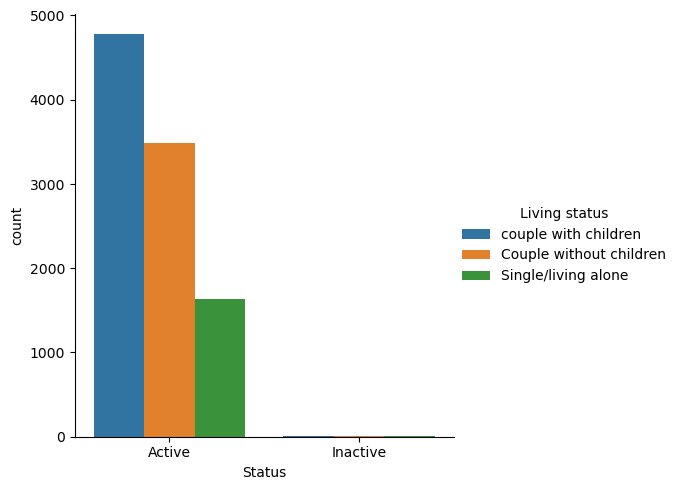

In [175]:
#Q.no:5 Living status
sns.catplot(x='Status',hue='Living status',data=df1,kind='count')
plt.show()

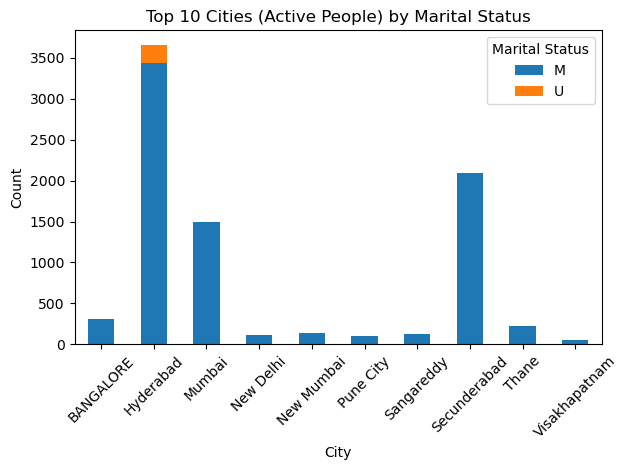

In [176]:

# 1. Filter for active people
df_active = df[df["Status"] == "Active"]

# 2. Get top 10 cities among active people
top10_cities_active = df_active["City"].value_counts().head(10).index

# 3. Filter again for those cities
df_active_top10 = df_active[df_active["City"].isin(top10_cities_active)]

# 4. Create pivot table for stacked bar
city_marital_counts = df_active_top10.groupby(["City", "MaritalStatus"]).size().unstack(fill_value=0)

# 5. Plot stacked bar
city_marital_counts.plot(kind="bar", stacked=True)

plt.title("Top 10 Cities (Active People) by Marital Status")
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Advanced Visual Insights
Below are additional charts created to explore customer trends and engagement in more depth.


C:\Users\DELL\AppData\Local\Temp\ipykernel_43300\3159379637.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


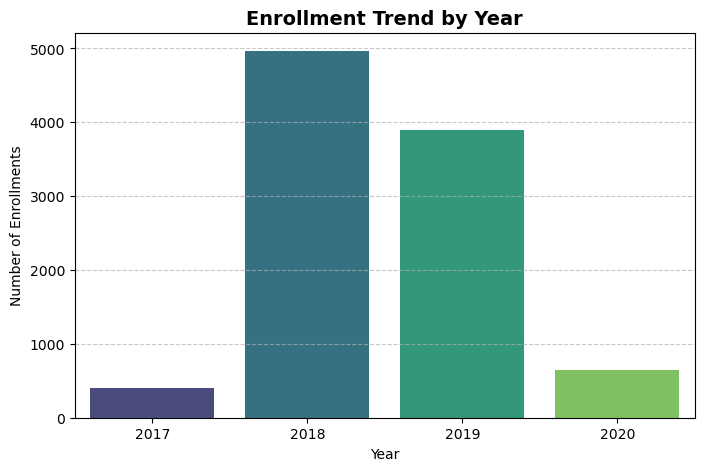

In [187]:
# Convert and extract year
df['Enrolled_on'] = pd.to_datetime(df['Enrolled_on'], errors='coerce')
df['Year'] = df['Enrolled_on'].dt.year

plt.figure(figsize=(8,5))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Enrollment Trend by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Enrollments')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


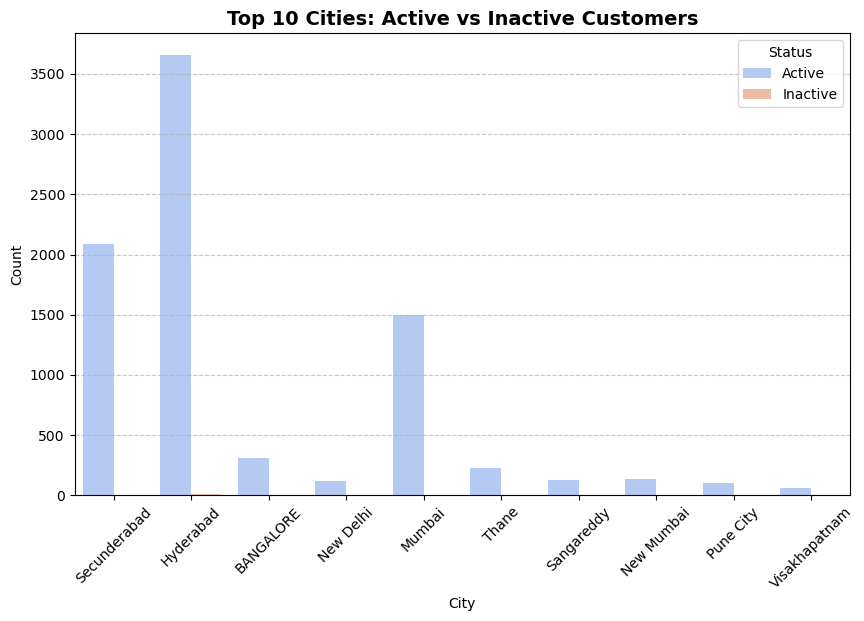

In [188]:
top_cities = df['City'].value_counts().nlargest(10).index
subset = df[df['City'].isin(top_cities)]

plt.figure(figsize=(10,6))
sns.countplot(data=subset, x='City', hue='Status', palette='coolwarm')
plt.title('Top 10 Cities: Active vs Inactive Customers', fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


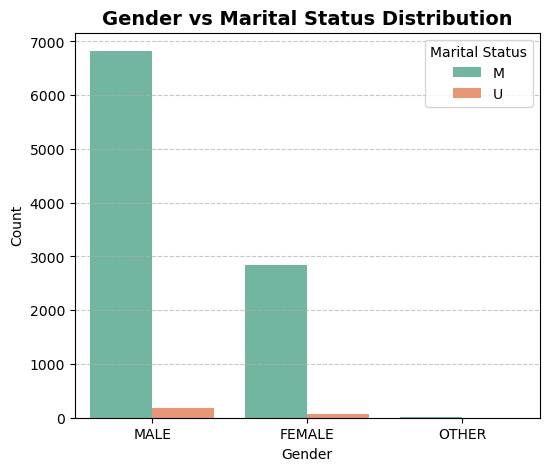

In [189]:
plt.figure(figsize=(6,5))
sns.countplot(x='GenderCode', hue='MaritalStatus', data=df, palette='Set2')
plt.title('Gender vs Marital Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 📌 Conclusion
- Data cleaning improved city and state consistency.
- Active participants dominate, showing strong engagement.
- Majority of participants were married and active.
- Most participants are married and from urban areas.
- Gender and marital trends show clear demographic preferences.
- Engagement highest in top cities like Hyderabad and Bangalore.
- Enrollment trend shows steady growth over years.
